# Intelligence artificielle - Automne 2025 - Laboratoire 04
# Recherche dans l'espace des états


## Introduction

La recherche d'un espace d'état ou la recherche d'un chemin nécessite une séquence d'actions dans l'espace d'états \begin{equation*} s_{0} \mapsto s_{f} \end{equation*} qui peut être :
* exploré, 
* découverte (frontière), 
* inexploré.

**A\*** est l'option la plus répandue pour ce type de problèmes dans le domaine de l'IA: l'algorithme trouve le chemin le plus court et utilise une heuristique pour se guider.

## Le problème d'aujourd'hui

Sur une carte bidimensionnelle comportant divers obstacles, trouvez le chemin le plus court entre deux positions à l'intérieur de celle-ci.

_Remarque:_ la variable **labyrinthe** jouera le rôle de la carte bidimensionnelle.

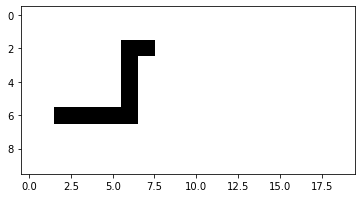

In [1]:
# Dimensions of the map.
height = 10
width = 20

# Bidimensional map as a list of lists.
# The empty cells are marked with 0, while blocks of walls with 1.
labyrinth = [[0 for c in range(width)] for r in range(height)]

for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

# Display labyrinth
%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest');

## Fonctions avancées

Pour simplifier le processus d'itération, nous pouvons utiliser: 

* `lambda`, la fonction anonyme qui retourne toujours une expression et qui a la syntaxe suivante:

```python
    lambda arguments: expression
```

In [6]:
# For this problem, we want to find the path 
# from the start point

start = (5, 5)

# to the end point.
final = (8, 8)

# Let us verify if having a list of tuples,
# their position corresponds to the endpoint.

# First, the lambda function:
is_final = lambda position: position == final

Lambda joue le rôle d'un argument d'entrée dans d'autres fonctions, telles que:

* `map`, qui passe chaque élément de l'itérable donné à une fonction:

```python
    map(function, iterable)
```

In [5]:
# Second, the map function:
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

* `filter` peut facilement sélectionner les valeurs d'une séquence ayant une certaine propriété:

```python
    filter(function, sequence)
```

In [9]:
list(filter(is_final, [(1,1), (3, 6), (8, 8)]))

[(8, 8)]

## L'algorithme A*

À l'aide des tâches suivantes, créez les éléments constitutifs de l'algorithme.

### Tâche 0

**a.** Étant donné une certaine position représentée par un `tuple`, trouvez si son emplacement est valable.

En explorant la carte bidirectionnelle, faites attention à:

* vérifier si les coordonnées disponibles se trouvent à l'intérieur du plan (0-hauteur, 0-largeur),
* vérifier si la position est libre et non occupé par un obstacle.

In [ ]:
def verify_location(position):
    # extract coordinates
    (x, y) = position
    
    """TO DO"""
    
    return False

In [ ]:
list(map(verify_location, [(-1,2), (height,3), (width,4), (5,5), (6,6), (0,9)])) 
# expected answer: [False, False, False, True, False, True]

**b.** Une fois que vous avez vérifié la position, retournez ses voisins vides dans une `list`.

Utilisez à la fois la fonction `filter` et la fonction `verify_location` écrites ci-dessus.

In [ ]:
def get_neighbours(position):
    
    """TO DO"""
    
    return result

In [ ]:
[get_neighbours(p) for p in [(0,9), (5,5)]]
# expected answer: [[(1, 10), (0, 10), (1, 9), (0, 8), (1, 8)], [(4, 4), (4, 5), (5, 4)]]

### Recherche heuristique

Après avoir vérifié les environs, nous voulons étendre notre frontière vers le but, plutôt que de chercher toutes les directions possibles.

### Tâche 1

**a.** Calculez la _distance euclidienne_ :

Pour deux dimensions : 

\begin{equation*}
d(a, b) = \sqrt{(a_{x} - b_{x})^{2} + (a_{y} - b_{y})^{2}}
\end{equation*}

In [ ]:
from math import sqrt

In [ ]:
def euclidean_distance(a, b):
    
    """TO DO"""
    
    return distance

In [ ]:
euclidean_distance((2,3), (4, 7))
# expected answer: 4.47213595499958

**b.** Calculez la _distance Manhattan_:

Pour deux dimensions:

\begin{equation*}
d(a, b) = \left | a_{x} - b_{x} \right | +  \left | a_{y} - b_{y} \right |
\end{equation*}

In [ ]:
def manhattan_distance(a, b):
    
    """TO DO"""
    
    return distance

In [ ]:
manhattan_distance((2,3), (4,0))
# expected answer: 5

Pour décider quel endroit doit être vérifié le premier à partir de la _frontier_, nous devons vérifier si le nouvel itinéraire possible est préférable que le meilleur précédent.

En pratique, cela pourrait être réalisé en utilisant une **file d'attente prioritaire**. 

In [10]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, ((1, 2), 'cost_so_far: 2'))
heappush(priority_queue, ((0, 1), 'cost_so_far: 1'))
heappush(priority_queue, ((1, 4), 'cost_so_far: 3'))

print(heappop(priority_queue))
print(heappop(priority_queue))
print(heappop(priority_queue))

((0, 1), 'cost_so_far: 1')
((1, 2), 'cost_so_far: 2')
((1, 4), 'cost_so_far: 3')


La frontière utilise une file d'attente prioritaire pour l'expansion et a la structure suivante:

`frontier[(discovered_nodes_as_tuple), (estimated_cost, node)]`

Sauvegardez les nœuds découverts dans un dictionnaire:

`d[new_node] = (parent, cost_so_far)`

* Le mouvement entre les cellules coûte une unité et représente le `coût réel g` ce qui permet de mesurer la distance réelle.
* La distance estimée au but est donnée par la `heuristic function` définie précédemment.

### Tâche 2

**a.** Implémentez l'algorithme **A\*** qui reçoit comme arguments le nœud de départ, le nœud final et la fonction heuristique.

In [ ]:
from heapq import heappop, heappush

In [ ]:
def astar(start, end, h):
    # Frontier as list
    frontier = []
    heappush(frontier, (0 + h(start, end), start))
    # Discovered nodes as dictionary
    discovered = {start: (None, 0)}
    while frontier:
        
        """TO DO"""
        
        break # remove this statement
    
    # Retrieve the path
    path = []
    return path # the path, as list of positions

**b.** Exécutez l'algorithme en utilisant différentes heuristiques.

In [ ]:
astar(start, final, euclidean_distance)

In [ ]:
astar(start, final, manhattan_distance)

**c.** Tracez la carte des coûts de cette aventure:

```python
cost_map = [[discovered[(r,c)][1] if (r,c) in discovered else 0 for c in range(width)]for r in range(height)]
pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');
```